In [1]:
import pandas as pd

In [3]:
sales = pd.read_csv('m5-forecasting-accuracy/sales_train_validation.csv')
calender = pd.read_csv('m5-forecasting-accuracy/calendar.csv')
prices = pd.read_csv('m5-forecasting-accuracy/sell_prices.csv')

In [4]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [6]:
calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [7]:
calender.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [8]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [9]:
prices.tail()

,store_id,item_id,wm_yr_wk,sell_price
6841116,WI_3,FOODS_3_827,11617,1.0
6841117,WI_3,FOODS_3_827,11618,1.0
6841118,WI_3,FOODS_3_827,11619,1.0
6841119,WI_3,FOODS_3_827,11620,1.0
6841120,WI_3,FOODS_3_827,11621,1.0


In [10]:
sales.shape

(30490, 1919)

In [11]:
sales.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

In [12]:
calender.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [13]:
prices.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [14]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [15]:
calender['date'] = pd.to_datetime(calender['date'])

In [16]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  162 non-null    object        
 8   event_type_1  162 non-null    object        
 9   event_name_2  5 non-null      object        
 10  event_type_2  5 non-null      object        
 11  snap_CA       1969 non-null   int64         
 12  snap_TX       1969 non-null   int64         
 13  snap_WI       1969 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 215.5+ KB


In [17]:
sales.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3
30489,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
subset = sales[
    (sales['dept_id'].isin(['FOODS_1','FOODS_2'])) &
    (sales['store_id'].isin(['CA_1','CA_2']))
]


In [42]:
df_long = subset.melt(id_vars=['id','item_id','dept_id','cat_id','store_id','state_id'],
                      var_name='d', value_name='sales')
df_long = df_long.merge(calender[['d','date']], on='d')


In [44]:
df_long

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date
0,FOODS_1_001_CA_1_validation,FOODS_1_001,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29
1,FOODS_1_002_CA_1_validation,FOODS_1_002,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29
2,FOODS_1_003_CA_1_validation,FOODS_1_003,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29
3,FOODS_1_004_CA_1_validation,FOODS_1_004,FOODS_1,FOODS,CA_1,CA,d_1,0,2011-01-29
4,FOODS_1_005_CA_1_validation,FOODS_1_005,FOODS_1,FOODS,CA_1,CA,d_1,3,2011-01-29
...,...,...,...,...,...,...,...,...,...
2349159,FOODS_2_395_CA_2_validation,FOODS_2_395,FOODS_2,FOODS,CA_2,CA,d_1913,0,2016-04-24
2349160,FOODS_2_396_CA_2_validation,FOODS_2_396,FOODS_2,FOODS,CA_2,CA,d_1913,1,2016-04-24
2349161,FOODS_2_397_CA_2_validation,FOODS_2_397,FOODS_2,FOODS,CA_2,CA,d_1913,0,2016-04-24
2349162,FOODS_2_398_CA_2_validation,FOODS_2_398,FOODS_2,FOODS,CA_2,CA,d_1913,0,2016-04-24


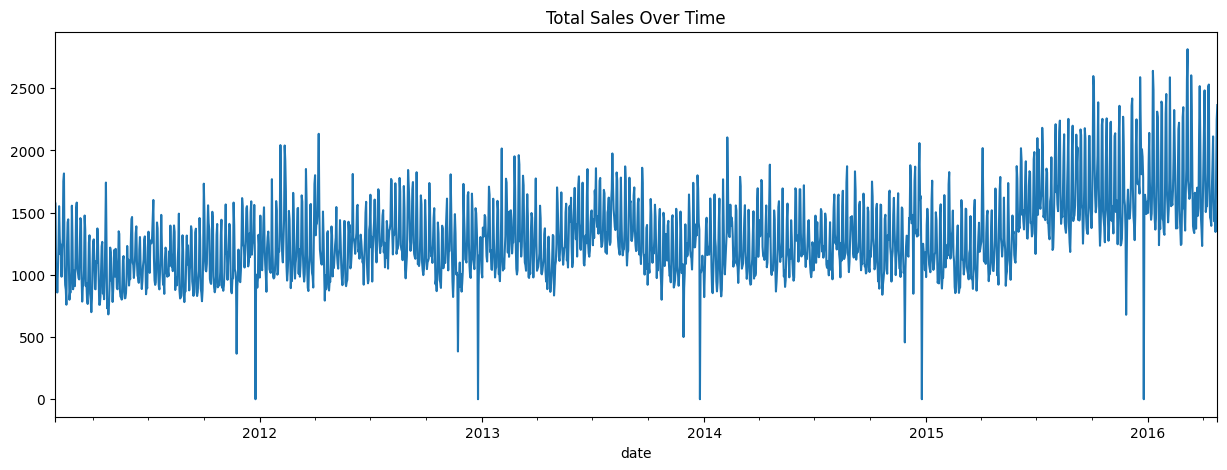

In [45]:
import matplotlib.pyplot as plt

df_long.groupby('date')['sales'].sum().plot(figsize=(15,5), title="Total Sales Over Time")
plt.show()


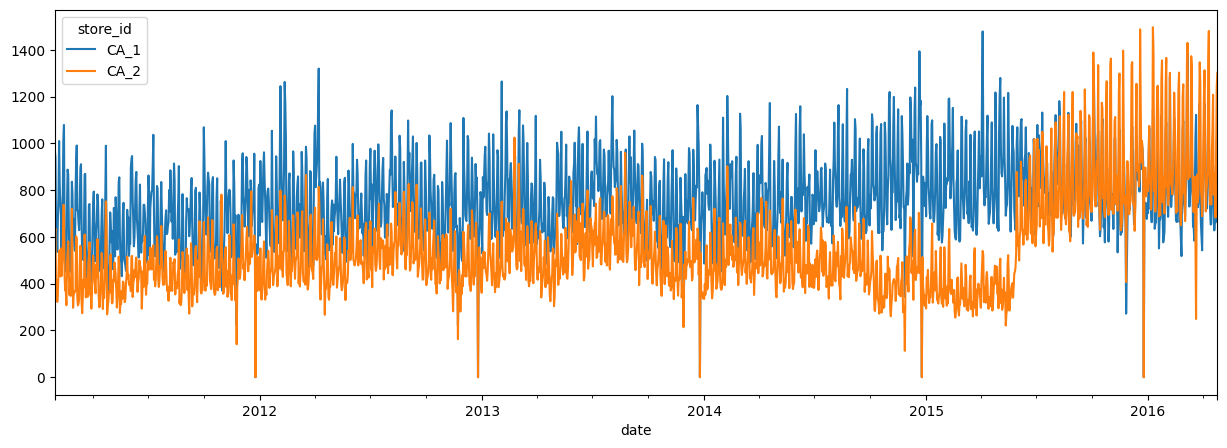

In [46]:
df_long.groupby(['date','store_id'])['sales'].sum().unstack().plot(figsize=(15,5))
plt.show()

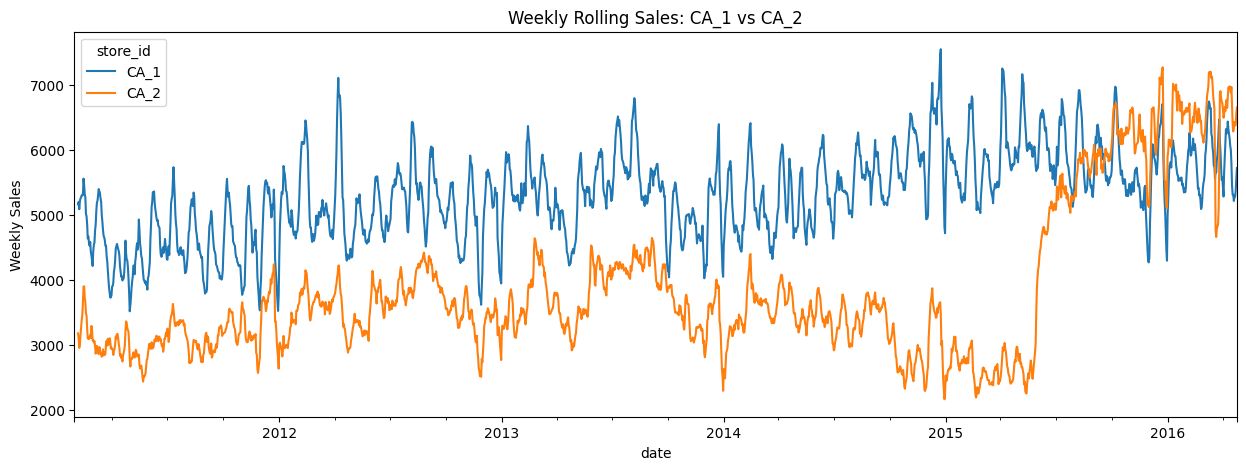

In [48]:
weekly_sales = df_store.groupby(['date','store_id'])['sales'].sum().unstack()
weekly_sales = weekly_sales.rolling(7).sum()  # 7-day rolling sum

weekly_sales.plot(figsize=(15,5), title='Weekly Rolling Sales: CA_1 vs CA_2')
plt.ylabel('Weekly Sales')
plt.show()



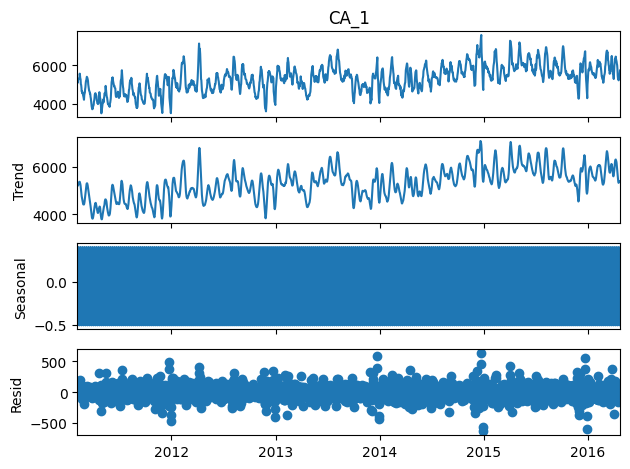

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = weekly_sales['CA_1'].dropna()  # or .interpolate()
result = seasonal_decompose(series, model='additive', period=7)  # weekly seasonality
result.plot()
plt.show()

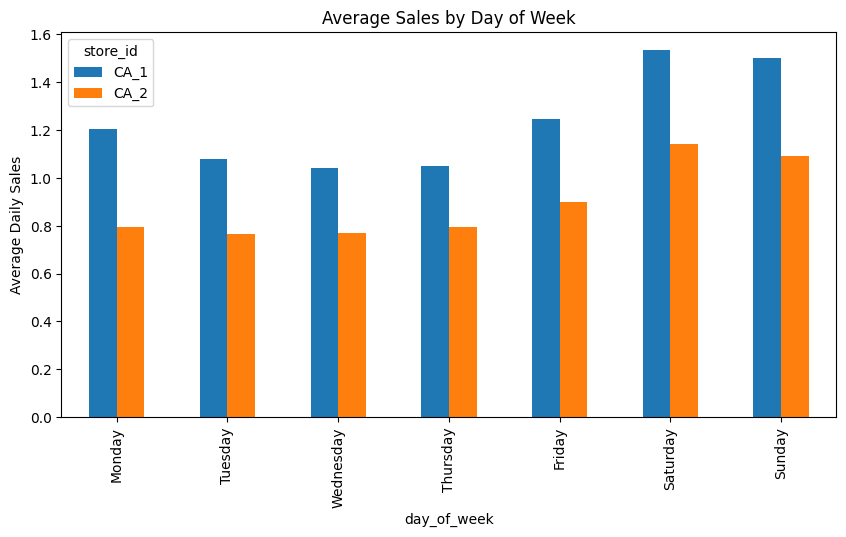

In [57]:
df_store['day_of_week'] = df_store['date'].dt.day_name()
dow_sales = df_store.groupby(['day_of_week','store_id'])['sales'].mean().unstack()
dow_sales = dow_sales.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

dow_sales.plot(kind='bar', figsize=(10,5), title='Average Sales by Day of Week')
plt.ylabel('Average Daily Sales')
plt.show()


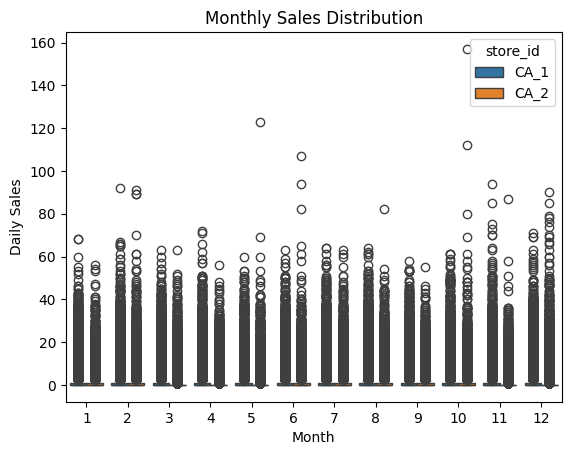

In [60]:
df_store['month'] = df_store['date'].dt.month
sns.boxplot(x='month', y='sales', hue='store_id', data=df_store)
plt.title('Monthly Sales Distribution')
plt.ylabel('Daily Sales')
plt.xlabel('Month')
plt.show()
